# BTCC TensorFlow Model - Transfer Learning for Object Detection
This Jupyter Notebook is the product of Thomas Hymel. The contents pertain to a specific part of a larger, collaborative project whose goal is to create an automatic scorer for a board game called **Between Two Castles of Mad King Ludwig.** The board game's gameplay is rather fun and goes by quickly, but after that the resultant game state for each player needs to be scored to determine the winner, which can often take a long time, or at least is not the most enjoyable activity. As it turns out, the end game state contains all the information necessary to score the game (that is, no points are scored and tracked during the game and would need to be added to the end game state). Not only is the end game state entirely sufficient, but it's possible that a picture, say, taken by a cell phone, can capture the entire state for each player. If a neural network can intepret that picture with enough discernability, it can extract the information necessary to calculate the end game state score via the establish scoring logic that a human would normally do. In summary, the main point of the project is to take a picture and instantly get the final score at the end of the game. A crucial part of this is the extraction of the information from an image. 

## Transfer Learning
In July 2020, when this notebook was made, computer vision is pretty advanced. We want to take advantage of these advances via **transfer learning**. Transfer learning is the concept that we leverage a neural network that has been pre-trained on a large, general dataset to establish a base general model of the visual world. That is, this pre-trained model has the ability to "see" images and decipher what is in them, but only if trained further on the desired classes (if your classes aren't apart of the pre-trained model).

Background links:
+ [A Gentle Introduction to Object Recognition with Deep Learning](https://machinelearningmastery.com/object-recognition-with-deep-learning/)
+ [Object Detection Training: Preparing your custom dataset](https://medium.com/deepquestai/object-detection-training-preparing-your-custom-dataset-6248679f0d1d)

Potentially useful links:
+ **[What I ended up using for Transfer Learning of YOLOv3](https://pylessons.com/YOLOv3-TF2-custrom-train/)**
    + [Continuation of the link above](https://pylessons.com/YOLOv3-TF2-custrom-images/)
+ [How to perform Object Detection with YOLOv3 in Keras](https://machinelearningmastery.com/how-to-perform-object-detection-with-yolov3-in-keras/)
+ [A guide to building your own object detector using YOLOv3](https://medium.com/analytics-vidhya/custom-object-detection-with-yolov3-8f72fe8ced79)
+ [Actually might be what I need in the best explained way](https://github.com/tensorflow/models/blob/master/research/object_detection/g3doc/tf2_training_and_evaluation.md)



In [1]:
# import relevant packages
import pandas as pd
import numpy as np

import tensorflow as tf

import random
import os
import glob
import PIL.Image
import xml.etree.ElementTree as ET

import matplotlib.pyplot as plt
import matplotlib as mpl
mpl.rcParams['figure.figsize'] = (30, 20) # 14in by 12in figure


I will be attempting to follow [this link](https://pylessons.com/YOLOv3-TF2-introduction/) to perform transfer learning for object detection. 

The first step is to clone the repository, as seen in the next code cell. I transferred the cloned repository to C:\Users\Thomas\Git-Repositories-Installed\TensorFlow-2.x-YOLOv3. After that, the requirements for the tutorial are checked and installed if they are not there (!pip install line).

In [49]:
#%%cmd
#git clone https://github.com/pythonlessons/TensorFlow-2.x-YOLOv3.git

Microsoft Windows [Version 10.0.18362.900]
(c) 2019 Microsoft Corporation. All rights reserved.

C:\Users\Thomas\Python Projects\BTCC-TF-Model>git clone https://github.com/pythonlessons/TensorFlow-2.x-YOLOv3.git

C:\Users\Thomas\Python Projects\BTCC-TF-Model>

Cloning into 'TensorFlow-2.x-YOLOv3'...
Checking out files: 100% (50/50), done.


In [8]:
!pip install --user -r C:\Users\Thomas\Git-Repositories-Installed\TensorFlow-2.x-YOLOv3\requirements.txt

In [9]:
%%cmd
cd C:\Users\Thomas\Git-Repositories-Installed\TensorFlow-2.x-YOLOv3\
python C:\Users\Thomas\Git-Repositories-Installed\TensorFlow-2.x-YOLOv3\detection_demo.py

Microsoft Windows [Version 10.0.18362.959]
(c) 2019 Microsoft Corporation. All rights reserved.

C:\Users\Thomas\Python Projects\BTCC-TF-Model>cd C:\Users\Thomas\Git-Repositories-Installed\TensorFlow-2.x-YOLOv3\

C:\Users\Thomas\Git-Repositories-Installed\TensorFlow-2.x-YOLOv3>python C:\Users\Thomas\Git-Repositories-Installed\TensorFlow-2.x-YOLOv3\detection_demo.py

C:\Users\Thomas\Git-Repositories-Installed\TensorFlow-2.x-YOLOv3>

Traceback (most recent call last):
  File "C:\Users\Thomas\Git-Repositories-Installed\TensorFlow-2.x-YOLOv3\detection_demo.py", line 31, in <module>
    detect_image(yolo, image_path, '', input_size=input_size, show=True, rectangle_colors=(255,0,0))
  File "C:\Users\Thomas\Git-Repositories-Installed\TensorFlow-2.x-YOLOv3\yolov3\utils.py", line 255, in detect_image
    pred_bbox = YoloV3.predict(image_data)
  File "C:\ProgramData\Anaconda3\lib\site-packages\tensorflow_core\python\keras\engine\training.py", line 909, in predict
    use_multiprocessing=use_multiprocessing)
  File "C:\ProgramData\Anaconda3\lib\site-packages\tensorflow_core\python\keras\engine\training_arrays.py", line 722, in predict
    callbacks=callbacks)
  File "C:\ProgramData\Anaconda3\lib\site-packages\tensorflow_core\python\keras\engine\training_arrays.py", line 189, in model_iteration
    f = _make_execution_function(model, mode)
  File "C:\ProgramData\Anaconda3\lib\site-packages\tensorflow_core\python\keras\engine

While following the tutorial, the previous command failed to make a prediction on an example image. I'm not sure why, but I will keep going along the tutorial to see if I hit any other errors. 

The next line is supposed to run a Python script to make the training data for the mnist dataset that was downloaded with git repository cloning. **It successfully ran and created a training and test data set**. 

In [11]:
%%cmd
cd C:\Users\Thomas\Git-Repositories-Installed\TensorFlow-2.x-YOLOv3\mnist
python "C:\Users\Thomas\Git-Repositories-Installed\TensorFlow-2.x-YOLOv3\mnist\make_data.py"

Microsoft Windows [Version 10.0.18362.959]
(c) 2019 Microsoft Corporation. All rights reserved.

C:\Users\Thomas\Python Projects\BTCC-TF-Model>cd C:\Users\Thomas\Git-Repositories-Installed\TensorFlow-2.x-YOLOv3\mnist

C:\Users\Thomas\Git-Repositories-Installed\TensorFlow-2.x-YOLOv3\mnist>python "C:\Users\Thomas\Git-Repositories-Installed\TensorFlow-2.x-YOLOv3\mnist\make_data.py"
Extracting all train files now...
Done!
Extracting all test files now...
Done!
=> C:\Users\Thomas\Git-Repositories-Installed\TensorFlow-2.x-YOLOv3\mnist\mnist_train\000001.jpg 357,1,385,29,1 44,221,100,277,3
=> C:\Users\Thomas\Git-Repositories-Installed\TensorFlow-2.x-YOLOv3\mnist\mnist_train\000002.jpg 124,245,146,267,1 8,290,22,304,3 53,23,75,45,9 255,381,283,409,7 320,160,404,244,8 269,259,381,371,7
=> C:\Users\Thomas\Git-Repositories-Installed\TensorFlow-2.x-YOLOv3\mnist\mnist_train\000003.jpg 361,197,383,219,8 231,27,287,83,6 147,40,189,82,9 169,228,211,270,3 336,270,392,326,8 204,302,232,330,6 231,212,287

After a successful run of the creation of the mnist training data, I will now attempt to run their Python script to train. **This ran for 5 hours and didn't terminate by itself** so I ended up restarting the terminal so that I could keep going with the tutorial.

In [ ]:
%%cmd
cd C:\Users\Thomas\Git-Repositories-Installed\TensorFlow-2.x-YOLOv3
python train.py tensorboard --logdir ./log

The next step in the tutorial is to use the trained model to make a prediction on an image from the mnist model. 

In [4]:
%%cmd
cd C:\Users\Thomas\Git-Repositories-Installed\TensorFlow-2.x-YOLOv3
python detect_mnist.py

Microsoft Windows [Version 10.0.18362.959]
(c) 2019 Microsoft Corporation. All rights reserved.

C:\Users\Thomas\Python Projects\BTCC-TF-Model>cd C:\Users\Thomas\Git-Repositories-Installed\TensorFlow-2.x-YOLOv3

C:\Users\Thomas\Git-Repositories-Installed\TensorFlow-2.x-YOLOv3>python detect_mnist.py

C:\Users\Thomas\Git-Repositories-Installed\TensorFlow-2.x-YOLOv3>

Traceback (most recent call last):
  File "detect_mnist.py", line 32, in <module>
    yolo.load_weights("./checkpoints/yolov3_custom_Tiny") # use keras weights
  File "C:\ProgramData\Anaconda3\lib\site-packages\tensorflow_core\python\keras\engine\training.py", line 181, in load_weights
    return super(Model, self).load_weights(filepath, by_name)
  File "C:\ProgramData\Anaconda3\lib\site-packages\tensorflow_core\python\keras\engine\network.py", line 1143, in load_weights
    pywrap_tensorflow.NewCheckpointReader(filepath)
  File "C:\ProgramData\Anaconda3\lib\site-packages\tensorflow_core\python\pywrap_tensorflow_internal.py", line 873, in NewCheckpointReader
    return CheckpointReader(compat.as_bytes(filepattern))
  File "C:\ProgramData\Anaconda3\lib\site-packages\tensorflow_core\python\pywrap_tensorflow_internal.py", line 885, in __init__
    this = _pywrap_tensorflow_internal.new_CheckpointReader(filename)
tensorflow.python.framework.errors_impl.NotFoundError: Unsuccessful TensorSli

Well that didn't work out because it couldn't find some file in a specific location. So I'm not going to deal with that error at the moment and hope that I can resolve any future error in the custom labels part of the tutorial (next up).

The next step in the tutorial is to run a custom script that converts the XML files to the YOLOv3 files. In addition to writing my own XML to YOLO function, I will continue following the tutorial so that I can perhaps get to the training custom model on the Google Cloud. 

In [137]:
%%cmd
cd C:\Users\Thomas\Git-Repositories-Installed\TensorFlow-2.x-YOLOv3
python tools\XML_to_YOLOv3.py

Microsoft Windows [Version 10.0.18362.959]
(c) 2019 Microsoft Corporation. All rights reserved.

C:\Users\Thomas\Python Projects\BTCC-TF-Model>cd C:\Users\Thomas\Git-Repositories-Installed\TensorFlow-2.x-YOLOv3

C:\Users\Thomas\Git-Repositories-Installed\TensorFlow-2.x-YOLOv3>python tools\XML_to_YOLOv3.py
C:\Users\Thomas\Git-Repositories-Installed\TensorFlow-2.x-YOLOv3\custom_dataset\train
C:\Users\Thomas\Git-Repositories-Installed\TensorFlow-2.x-YOLOv3\custom_dataset\train\20200710_114952.jpg 1268,966,1818,1444,0
C:\Users\Thomas\Git-Repositories-Installed\TensorFlow-2.x-YOLOv3\custom_dataset\train\20200710_114954.jpg 1369,1003,2051,1607,0
C:\Users\Thomas\Git-Repositories-Installed\TensorFlow-2.x-YOLOv3\custom_dataset\train\20200710_114959.jpg 1033,1185,1479,1685,0
C:\Users\Thomas\Git-Repositories-Installed\TensorFlow-2.x-YOLOv3\custom_dataset\train\20200710_115003.jpg 1125,1267,1607,1808,0
C:\Users\Thomas\Git-Repositories-Installed\TensorFlow-2.x-YOLOv3\custom_dataset\train\20200710_1

**The tutorial's XML to YOLO script worked.** Now that everything is set up for custom training, I will attempt to run the tutorial's training script after changing some code in it to denote that it needs to train from the custom dataset.

In [139]:
%%cmd
cd C:\Users\Thomas\Git-Repositories-Installed\TensorFlow-2.x-YOLOv3
python train.py tensorboard --logdir ./log

Microsoft Windows [Version 10.0.18362.959]
(c) 2019 Microsoft Corporation. All rights reserved.

C:\Users\Thomas\Python Projects\BTCC-TF-Model>cd C:\Users\Thomas\Git-Repositories-Installed\TensorFlow-2.x-YOLOv3

C:\Users\Thomas\Git-Repositories-Installed\TensorFlow-2.x-YOLOv3>python train.py tensorboard --logdir .\log
skipping conv2d_74
skipping conv2d_66
skipping conv2d_58
epoch: 0 step:    2/5, lr:0.000020, giou_loss:   3.19, conf_loss:2093.96, prob_loss:   2.36, total_loss:2099.51
epoch: 0 step:    3/5, lr:0.000030, giou_loss:   2.48, conf_loss:1543.47, prob_loss:   1.76, total_loss:1547.72
epoch: 0 step:    4/5, lr:0.000040, giou_loss:   2.74, conf_loss:1515.44, prob_loss:   1.82, total_loss:1520.00
epoch: 0 step:    0/5, lr:0.000050, giou_loss:   2.97, conf_loss:1483.73, prob_loss:   1.97, total_loss:1488.68
epoch: 0 step:    1/5, lr:0.000060, giou_loss:   2.42, conf_loss:1434.69, prob_loss:   1.61, total_loss:1438.72


giou_val_loss:   3.02, conf_val_loss:1802.52, prob_val_loss: 

2020-07-20 18:44:27.104140: W tensorflow/core/framework/cpu_allocator_impl.cc:81] Allocation of 177209344 exceeds 10% of system memory.
2020-07-20 18:44:27.323697: W tensorflow/core/framework/cpu_allocator_impl.cc:81] Allocation of 177209344 exceeds 10% of system memory.
2020-07-20 18:44:29.400834: W tensorflow/core/framework/cpu_allocator_impl.cc:81] Allocation of 177209344 exceeds 10% of system memory.
2020-07-20 18:44:29.589207: W tensorflow/core/framework/cpu_allocator_impl.cc:81] Allocation of 178062336 exceeds 10% of system memory.
2020-07-20 18:46:26.634415: W tensorflow/core/framework/cpu_allocator_impl.cc:81] Allocation of 178062336 exceeds 10% of system memory.


**The tutorial next utilized Google Colaboratory to train a transfer learning model**. The following text is used to save a TF/Keras model and then load it and then convert it to TensorFlow Lite output. I am putting that code here because it's code that needs to be run in the Google Colab and if I close and reopen the notebook then the code is lost. 

In [ ]:
# Code used in Google Colab after model has been trained to save model, and then load that model and save it to a TensorFlow Lite file format
"""
# save the model that is in memory to some directory in Google Drive
yolo.save('./directly_saved_models/name_of_model_folder_here')

# Convert the model.
converter = tf.lite.TFLiteConverter.from_saved_model('./directly_saved_models/name_of_model_folder_here')
converter.target_spec.supported_ops = [tf.lite.OpsSet.TFLITE_BUILTINS,
                                       tf.lite.OpsSet.SELECT_TF_OPS]
tflite_model = converter.convert()

# Save the TF Lite model.
with tf.io.gfile.GFile('./directly_saved_models/TFLite_exports/name_of_model.tflite', 'wb') as f:
  f.write(tflite_model)
"""

Instead of running their custom script I am just going to code my own because it doesn't look that difficult and it would give me more control and understanding of what is happening. 

#### XML_to_YOLO function
This function is used to convert XML files to the format needed for YOLOv3. The YOLOv3 format, saved by labelImg, seems to be the following, in a text file separated by spaces
+ \< object class \> [int] : the number, an int, corresponds to the class, as given by the index (or row) of the associated files path
+ \< x \> [float 0-1] : the x coordinate of the center of the bounding box, normalized by the image's x-dimension n so that the number is between 0 and 1
+ \< y \> [float 0-1] : the y coordinate of the center of the bounding box, normalized by the image's y-dimension so that the number is between 0 and 1
+ \< width \> [float 0-1] : the x width of the bounding box, normalized by the image's x-dimension so that the number is between 0 and 1
+ \< height \> [float 0-1] : the x width of the bounding box, normalized by the image's x-dimension so that the number is between 0 and 1

An example entry could be something like this: 
12 0.3124656 0.424566 0.11123 0.234641

In [128]:
def XML_to_YOLO(classes_path, folder_path):
    """
    Inside the folder path, creates an individual .txt file (containing the YOLO format) for every XML file that exists in the folder,
    utilizing the classes file path to know what class number it needs. 
    ***********
    NOTE that a classes file needs to exist already for this to work. It WILL NOT automatically create a classes/index file
    ***********
    
    Args:
        classes_path [str]: a string that is the file path to the .txt file that contains the classes
        folder_path [str]: a string that is the file path to the folder that contains the XML files (and presumably the images)
                           New files will be written to this folder
    Returns:
        None (writes to files though)
    
    """
    
    # importing the xml reading/writing module
    import xml.etree.ElementTree as ET
    
    # create a dict that contains the class name as key and integer label as value as dictated by the order in the classes.txt folder
    with open(classes_path, 'r') as file:
        classes_list = file.read().splitlines()
    class_dict = {classes_list[i]: i for i in range(len(classes_list))}
    
    # grab all the xml files in the folder_path (and any subfolders as well???)
    xmls_full_path = []
    for r, d, f in os.walk(folder_path):
        for file in f:
            if '.xml' in file:
                xmls_full_path.append(os.path.join(r,file))  # saves the entire file path with the xml file name
    
    # go through each xml file, find all the bounding boxes in that XML file, and convert them to YOLO format
    for current_xml in xmls_full_path:
        path_name_only = os.path.dirname(current_xml) + "\\"   # gets only the string of the path to the current xml file, adding the slashes that were stripped 
        file_name_only = os.path.splitext(os.path.basename(current_xml))[0]  # gets only the string of the file name of the xml file
        tree = ET.parse(current_xml)  # open up the XML file into a python data Element object
        root = tree.getroot()         # get the root of the XML file
        xwidth, yheight = float(root.find('size').find('width').text), float(root.find('size').find('height').text)  # grabs the width (x dimension) and height (y dimension) of the current image as recorded in the XML file
        list_of_obj_strings = []    # building up this list of YOLO formats text strings to write to a text file
        for i, obj in enumerate(root.iter('object')): # goes through each "object" node (each notated bounding box)
            name = obj.find('name').text    # the text that is contained in the 'name' node, which defines the class
            name_id = class_dict[name]      # the int id of the class name, as determined by the classes txt file
            bbox_node = obj.find('bndbox')  # the bounding box node of the current object is found
            xmin, ymin, xmax, ymax = float(bbox_node.find('xmin').text), float(bbox_node.find('ymin').text), float(bbox_node.find('xmax').text), float(bbox_node.find('ymax').text) # float form of the xmin, ymin, xmax, ymax bbox dims
            xcenter_norm, ycenter_norm, width_norm, height_norm = ((xmin+xmax)/2)/xwidth, ((ymin+ymax)/2)/yheight, (xmax-xmin)/xwidth, (ymax-ymin)/yheight  # the math to convert to the YOLO format numbers that matter
            obj_string = ' '.join([str(name_id), str(xcenter_norm), str(ycenter_norm), str(width_norm), str(height_norm)])  # YOLO format for this current bounding box
            list_of_obj_strings.append(obj_string+'\n')   # each object gets its own line in the eventual txt file, so concatenate the newline character at the end
        with open(path_name_only + file_name_only + '.txt', 'w') as write_to_file:  # opens a file with the same name as the xml file, in the same location
            write_to_file.write(''.join(list_of_obj_strings))
                               
    return None

In [129]:
tree = ET.parse(xmls[0])  # open up the XML file into a python data Element object
root = tree.getroot()         # get the root of the XML file
xwidth, yheight = float(root.find('size').find('width').text), float(root.find('size').find('height').text)
for i, obj in enumerate(root.iter('object')): # goes through each "object" (each notated bounding box)
    name = obj.find('name').text    # the text that is contained in the 'name' node, which defines the class
    name_id = class_dict[name]      # the int id of the class name
    bbox_node = obj.find('bndbox')
    xmin, ymin, xmax, ymax = float(bbox_node.find('xmin').text), float(bbox_node.find('ymin').text), float(bbox_node.find('xmax').text), float(bbox_node.find('ymax').text)
            
print(xwidth, yheight)
print(xmin, ymin, xmax, ymax)

print(os.path.basename(xmls[0]))

3024.0 3024.0
1268.0 1029.0 1941.0 1602.0
20200710_114949.xml


In [119]:
# testing and then using the XML_to_YOLO function
fp_predclass = 'C:\\Users\\Thomas\\Python Projects\\BTCC-Data\\data\\predefined_classes.txt'
fp_to_change = "C:\\Users\\Thomas\\Python Projects\\BTCC-Data\\data\\"
XML_to_YOLO(fp_predclass, fp_to_change)

## Data Augmentation for Object Detection
Links on data augmentation:
+ [Paper about machine learning the best data augmentation techniques for object detection](https://arxiv.org/abs/1906.11172)
+ [Part 1 of 4: Data Augmentation for Bounding Boxes](https://blog.paperspace.com/data-augmentation-for-bounding-boxes/). Excellent series of blog posts detailing an implementation of data augmentation for object detection, specifically augmentations that involve the necessary transformation of the bounding boxes (data augmentations that do not change the bounding boxes are trivial)
+ [TensorFlow Tutorial on Data Augmentation](https://www.tensorflow.org/tutorials/images/data_augmentation)

### Data Augmentation with TensorFlow 2 - Color Only
Initially I will focus on data augmentation using color changes only. When I say color changes only I mean that the bounding boxes of the images will *not* be changed in this set of augmentations. I will follow this [TensorFlow Tutorial on Data Augmentation](https://www.tensorflow.org/tutorials/images/data_augmentation) to help with data augmentation of color changes only. 

**Here are the color augmentations that are already built into the tf.image API**:
+ **adjust_brightness**(image, delta) - pixel value delta is added to all pixel values in image. delta is a fraction [-1,1]
    + **random_brightness**(image, max_delta, seed[optional]) - equivalent to adjust_brightness() using a delta randomly picked in the interval [-max_delta, max_delta)
+ **adjust_contrast**(image, contrast_factor) - contrast_factor is used to change pixel value x to mean + (x-mean(x_all)) * contrast_factor. Useful constrast_factor number would be in the range of [0.5, 2.5]
    + **random_contrast**(image, lower, upper, see[optiona]) - equivalent to adjust_contrast() but uses a contrast_factor randomly picked in the interval [lower,upper]
+ **adjust_gamma**(image, gamma, gain) - Power Law Transform. Out = gain * in^gamma. 
+ **adjust_hue**(image, dela) - Changes to HSV format, then applies Hue delta. Delta must be [-1,1] but really because colors are a useful indicator of the tiles, we don't want to change the colors that much, so if this augmentation is used it should be limited to [-0.05, 0.05]
    + **random_hue**(image, max_delta) - Does adjust_hue() but uses a delta randomly picked in [-max_delta, max_delta]. max_delta must be in the interval [0, 0.5]
+ **adjust_saturation**(image, saturation_factor) - Converts to HSV, adds offset to Saturation, and then converts back. Because this can affect color changes as well, keep the saturation_factor in the range of [0.7,2.5].
    + **random_saturation**(image, lower, upper) - Does adjust_saturation(), but uses a saturation_factor that comes from the range [lower, upper]. 
+ **rgb_to_grayscale**
+ **adjust_jpeg_quality**(image, jpeg_quality) - jpeg_quality must be an integer in the interval [0,100] (lower the number, the worse quality it is)
    + **random_jpeg_quality**(image, min_jpeg_quality, max_jpeg_quality) - Does adjust_jpeg_quality() but with a number between min and max
+ **per_image_standaradization**(image) - linearly scales image to have mean 0 and variance 1. Note that this is basically adjust_contrast and as such can greatly affect color

**Here are the color augmentations that are built into tfa.image API (TensorFlow Addons, requires TF2.2 version to work)**
+ **equalize**(image) - equalizes image
+ **sharpness**(image, factor) - factor must be greater than 0. Returns image but "sharper": edges are more pronounced. Sharpening is adding "edge contrast". 

### Data Augmentation with TensorFlow 2 - Geometric Transformations
Later I will focus on geometric transformations: changes to the image that require the bounding box labels to also be changed accordingly. The information below could be useful in the future when I tackle this problem. 

**Here are the geometric augmentations that are already built into the tf.image API**:
+ **rot90**(image, k=1) - rotates the entire image by 90 degrees LEFT, k number of times. 

**Here are the geometric augmentations that are built into tfa.image API (TensorFlow Addons, requires TF2.2 version to work)**
+ **rotate**(image, angle) - rotates the image entire image by angle, given in radians. Images returned are same type and shape as image, rotated by the given angle. Empty space due to the rotation will be filled with zeros (black). 
+ **shear_x**(image, level, replace) - Shears image by level factor, with space outside image filled with replace value
+ **shear_y**(image, level, replace) - Shears image by level factor, with space outside image filled with replace value
+ **translate**(image, translations, interpolation) - translations is a vector (dx,dy) that governs the image translation. Empty space due to the translation will be filled with zeros. 

In [52]:
# folder of the data used for Single Class model
fp_scm = "C:\\Users\\Thomas\\Python Projects\\BTCC-Data\\July-8th\\Quads\\"

# extract information lists from the folder
jpgs = glob.glob(fp_scm + "*.jpg")  # grabs strings of filepaths of all .jpg in the specified filepath
xmls = glob.glob(fp_scm + "*.xml")  # grabs strings of filepaths of all .xml in the specified filepath

# decode image to TF tensor format
image_string = tf.io.read_file(jpgs[31])
image = tf.image.decode_jpeg(image_string, channels = 3)

2


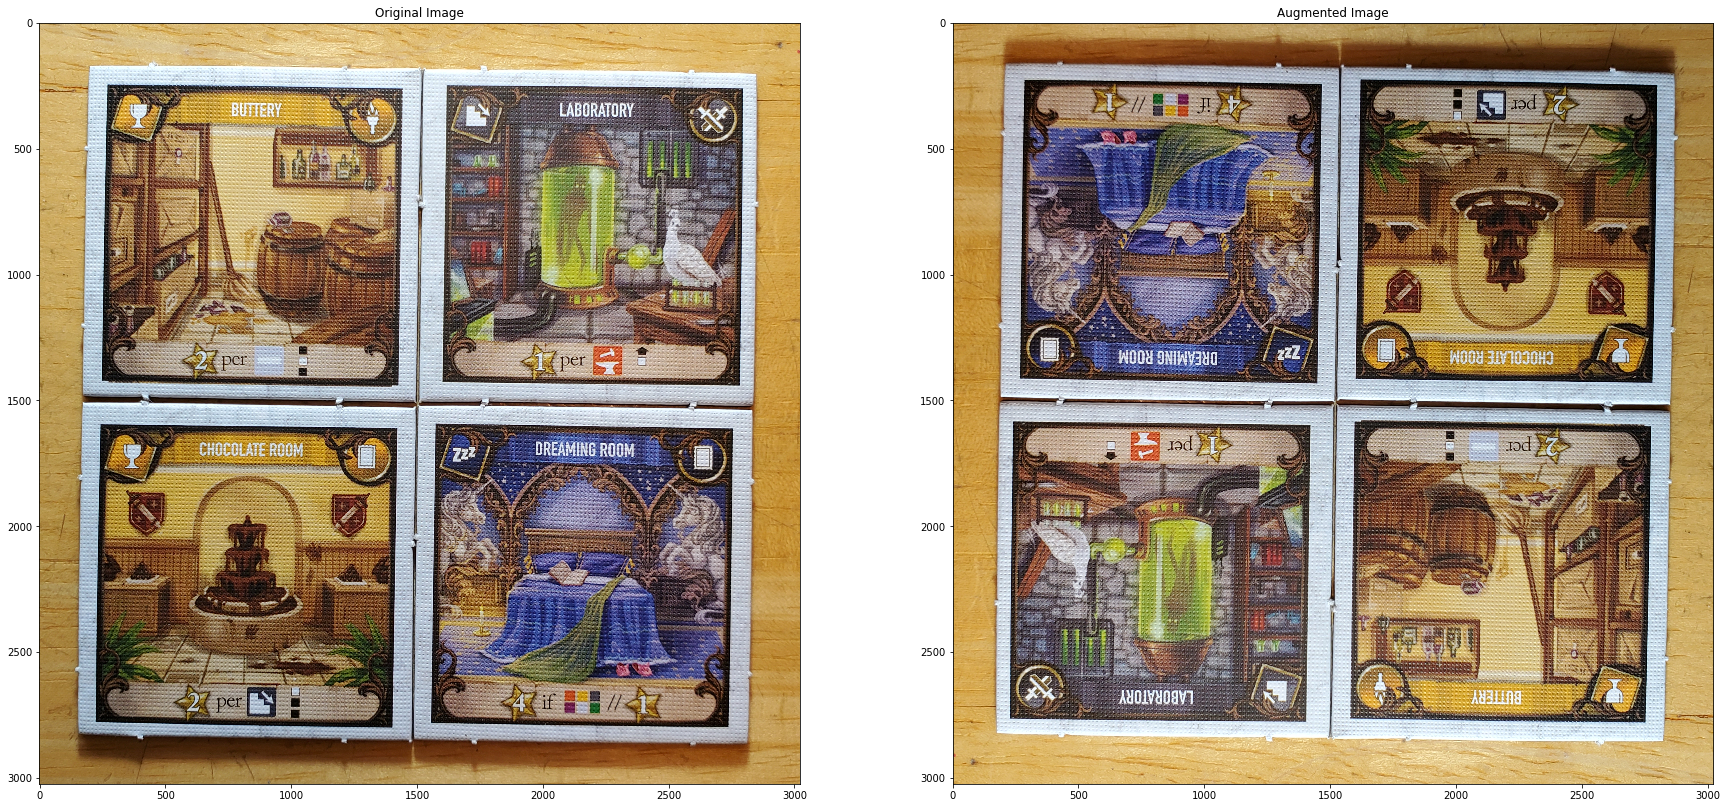

In [85]:
# testing visualize function using some of the image augmentations above
rand_im = image
if random.random() < 0.4:
    rand_im = tf.image.random_saturation(rand_im, 0.6,2.5)
    print('saturation')
if random.random() < 0.4:
    rand_im = tf.image.random_brightness(rand_im, 0.25)
    print('brightness')
if random.random() < 0.4:
    rand_im = tf.image.random_contrast(rand_im, 0.5, 2.5)
    print('contrast')
if random.random() < 0.4:
    rand_im = tf.image.random_hue(rand_im, 0.04) 
    print('hue')

random_num = random.random()
if random_num < 0.6:
    num_rot = int(5*random_num)+1 
    print(num_rot)
    rand_im = tf.image.rot90(rand_im, k = num_rot)

visualize(image, rand_im)

#### rot90_jpg_XML function and batch_rot90 function
In order to have the model be more robust to slight rotations of the tiles in the pictures, I want to create "original" image data that is simply the 90 degrees rotation of other original images. Because this is a geometric transformation, the XML bounding box numbers will need to be changed as well. The rot90_jpg_XML function will take in a image file and its XML file (both in the same folder) and return a rotated TensorFlow image and a python XML object (ElementTree)

batch_rot90 function rotates a batch of images.

In [64]:
def rot90_jpg_XML(jpg_path, xml_path):
    """
    Rotates an image by 90 degrees to the left and correctly changes the bounding boxes in the XML files. 
    
    Args:
        jpg_path [str]: string of full path to the jpg of the image
        xml_path [str]: string of full path to the xml file that is associated with the current image
    
    Returns:
        asdf
        asdf 
    """
    
    import xml.etree.ElementTree as ET
    
    def rotate_corners_90(corners_list, image_width, image_height):
        """
        Helper function to do the math of the rotating of the corners
        
        Returns:
            list: list of rotated bounding box corners
        """
        rot_corners_list = []
        for corner in corners_list: 
            x,y = corner[0], corner[1]     # if you transpose the (x,y) image coordinates you get to the 1st quadrant of a normal xy coordinate system
            x_rot = int(y)  # old formula: int(image_height/2 - (y - image_width/2)) 
            y_rot =  int(image_width-x) # old formula: int(image_width/2 + (x - image_height/2))
            rot_corners_list.append([x_rot, y_rot])   # transpose image coordinates back after you do the transformation
        return rot_corners_list
        
    # use the jpg filepath to decode the jpg file into a TF image and then rotate it using a rot90 tf.image method
    image = tf.image.decode_jpeg(tf.io.read_file(jpg_path), channels = 3)

    
    # xml rotation part
    tree = ET.parse(xml_path)     # open up the XML file into a python data Element object
    root = tree.getroot()         # get the root of the XML file
    xwidth, yheight = int(root.find('size').find('width').text), int(root.find('size').find('height').text)  # grabs the width (x dimension) and height (y dimension) of the current image as recorded in the XML file
    for i, obj in enumerate(root.iter('object')): # goes through each "object" node (each notated bounding box)
        bbox_node = obj.find('bndbox')  # the bounding box node of the current object is found
        xmin, ymin, xmax, ymax = float(bbox_node.find('xmin').text), float(bbox_node.find('ymin').text), float(bbox_node.find('xmax').text), float(bbox_node.find('ymax').text) # float form of the xmin, ymin, xmax, ymax bbox dims
        corners = [[xmin, ymin], [xmax, ymin], [xmin, ymax], [xmax,ymax]]  # list of the four corners of the bounding box
        rot_cor = np.array(rotate_corners_90(corners, xwidth, yheight))   # returns the four corners of the bounding box but rotated into the new coordinates
        new_xmin, new_ymin, new_xmax, new_ymax = np.min(rot_cor[:,0]), np.min(rot_cor[:,1]), np.max(rot_cor[:,0]), np.max(rot_cor[:,1])
        obj.find('bndbox').find('xmin').text, obj.find('bndbox').find('ymin').text, obj.find('bndbox').find('xmax').text, obj.find('bndbox').find('ymax').text= str(int(new_xmin)), str(int(new_ymin)), str(int(new_xmax)), str(int(new_ymax))  # replace the old XML numbers with the new ones
    root.find('size').find('width').text, root.find('size').find('height').text = str(yheight), str(xwidth)# exchange the height and width of the image
        
    xml_rot90 = tree
    image_rot90 = tf.image.rot90(image, k=1)   # rotates image 90 degrees to the left
    
    return image_rot90, xml_rot90

In [62]:
def batch_rot90(folder_path_origin, folder_path_destination):
    """
    Rotates an entire folder which contains jpgs and correspondingly named xmls
    
    Args:
        folder_path_origin [str]: string of the path to the folder that contains jpgs and xmls (assuming with the same file name) 
        folder_path_destination [str]: string of the path to the folder that will write the jpgs and xmls to
        
    Returns:
        None (writes to files though)
    """
    
    jpgs = glob.glob(folder_path_origin + "*.jpg")  # grabs strings of filepaths of all .jpg in the specified filepath
    xmls = glob.glob(folder_path_origin + "*.xml")  # grabs strings of filepaths of all .xml in the specified filepath
    
    folder_name_only = os.path.split(os.path.split(folder_path_destination)[0])[1]  # grabs only the folder_name
    
    # go thorugh all xmls in the folder and use rot90_jpg_XML on all of them
    for current_xml in xmls:
        path_name_only = os.path.dirname(current_xml) + "\\"   # gets only the string of the path to the current xml file, adding the slashes that were stripped 
        file_name_only = os.path.splitext(os.path.basename(current_xml))[0]  # gets only the string of the file name of the xml file
        jpg_fp = [x for x in jpgs if file_name_only in x]                 # grabs the jpg full file path of the same xml file name
        image_rot90, xml_rot90 = rot90_jpg_XML(jpg_fp[0], current_xml)    # rotates the current image and bounding boxes in the xml
        
        # changes to the correct file name extension depending on the name of the file name already
        if file_name_only.endswith("_90"):
            rotation = "_180"
            rot_file_name = file_name_only[:len(file_name_only)-3] + rotation # slices off the "_90" and replaces it with "_180"
        elif file_name_only.endswith("_180"):
            rotation = "_270"
            rot_file_name = file_name_only[:len(file_name_only)-4] + rotation # slices off the "_180" and replaces it with "_270"
        else:
            rotation = "_90"
            rot_file_name = file_name_only + rotation
        
        # Image encoding and writing
        enc_image = tf.io.encode_jpeg(image_rot90)  # encoding TensorFlow tensor image into jpg
        tf.io.write_file(folder_path_destination + rot_file_name + ".jpg", enc_image) # writes the image to jpg and the correct path
        
        # changing the pathing information inside .xml and writing to the new .xml file
        root = xml_rot90.getroot()
        root.find('folder').text = folder_name_only
        root.find('filename').text = rot_file_name + ".jpg"
        root.find('path').text = folder_path_destination + rot_file_name + ".jpg"
        
        xml_rot90.write(folder_path_destination + rot_file_name + ".xml")
    
    return None

In [68]:
# running the batch_rot90 function to create new image and XML data
batch_fp_origin = "C:\\Users\\Thomas\\Python Projects\\BTCC-Data\\Aug-5th\\180degreeLeft\\"
batch_fp_destination = "C:\\Users\\Thomas\\Python Projects\\BTCC-Data\\Aug-5th\\270degreeLeft\\"
batch_rot90(batch_fp_origin, batch_fp_destination)

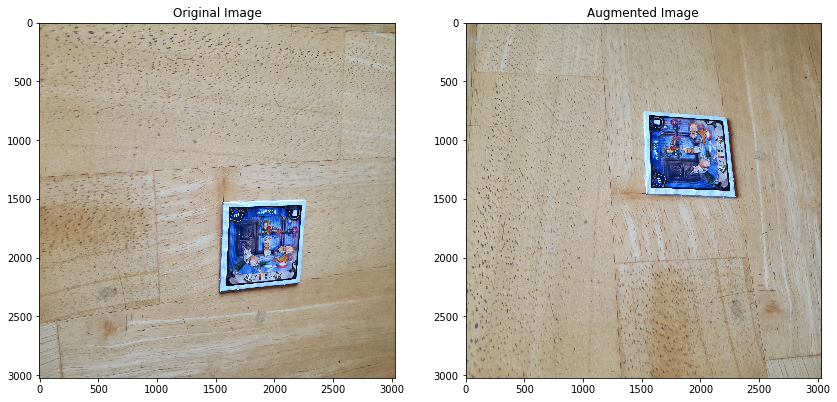

In [188]:
test_rot90_image, test_rot90_xml = rot90_jpg_XML(jpgs[14],xmls[14])
visualize(tf.image.decode_jpeg(tf.io.read_file(jpgs[14]), channels = 3), test_rot90_image)

#### transform_TR_bboxes, create_XML_copies, batch_transform_TR
At a point in this project I needed to automatically transform the Throne Room bounding box ground truth labels to a subset of them. I did the math to figure out the relative distances that the bounding box corners needed to move. That will be implemented in transform_TR_bboxes. Then, after that, I will batch transform a bunch of XMLs using the batch_transform_TR function. 

Due to the way that the XML and jpg files are paired up, I need the new XML files to have the same name as the old one. However, I don't want to lose all the original bounding boxes, in the case that I need them in the future. So before I do any transforming, I will create copies of the original XML files so that I know I have the original in case anything goes wrong. 

In [14]:
def transform_TR_bboxes(xml_path):
    """
    Transforms the bounding boxes of the Throne Rooms in the given XML's file
    
    Args:
        xml_path [str]: string of the file path to the xml file needing to be transformed
    """
    
    TR_list = ['TRCF', 'TRCD', 'TRLC', 'TRUS', 'TRLS', 'TRUF', 'TRFS']   # defines the object labels we are looking to change
    
    tree = ET.parse(xml_path)     # open up the XML file into a python data Element object
    root = tree.getroot()         # get the root of the XML file
    for i, obj in enumerate(root.iter('object')): # goes through each "object" node (each notated bounding box)
        if obj.find('name').text in TR_list:      # "object" is currently a bounding box that denotes a Throne Room
            bbox_node = obj.find('bndbox')        # the bounding box node of the current object is found
            xmin, ymin, xmax, ymax = float(bbox_node.find('xmin').text), float(bbox_node.find('ymin').text), float(bbox_node.find('xmax').text), float(bbox_node.find('ymax').text) # float form of the xmin, ymin, xmax, ymax bbox dims
            w = xmax-xmin
            h = ymax-ymin
            if w > h:       # normal case where TR width is normal width
                new_xmin = xmin + (27.0/55.0)*w     # ratios to move determined by physically measuring the tiles and their ratios
                new_ymin = ymin + (22.5/27.0)*h
                new_xmax = xmax - (19.0/55.0)*w
                new_ymax = ymax - (1.5/27.0)*h
            else:
                new_xmin = xmin + (1.5/27.0)*w 
                new_ymin = ymin + (27.0/55.0)*h
                new_xmax = xmax - (22.5/27.0)*w
                new_ymax = ymax - (19.0/55.0)*h
                
            # replace the old XML numbers with the new ones
            obj.find('bndbox').find('xmin').text, obj.find('bndbox').find('ymin').text, obj.find('bndbox').find('xmax').text, obj.find('bndbox').find('ymax').text= str(int(new_xmin)), str(int(new_ymin)), str(int(new_xmax)), str(int(new_ymax))  

    xml_transformed_TR = tree
    
    return xml_transformed_TR

In [22]:
def batch_transform_TR(folder_path):
    """
    asdf
    """
    
    xmls_all = glob.glob(folder_path + "*.xml")  # grabs strings of filepaths of all .xml in the specified filepath
    
    xmls_to_change = [xml for xml in xmls_all if xml[len(xml)-9:len(xml)-4] != '_orig']   # exclude the original xml files, if any exist in that folder
    print(xmls_to_change)
    
    for current_xml in xmls_to_change:
        transformed_tree = transform_TR_bboxes(current_xml)
        transformed_tree.write(current_xml)
    
    return None

In [23]:
#fp_xml_transform = "C://Users//Thomas//Python Projects//BTCC-Data//""
#batch_transform_TR(fp_xml_transform)

['C://Users//Thomas//Python Projects//BTCC-Data//create-XML-test\\20200708_154143.xml', 'C://Users//Thomas//Python Projects//BTCC-Data//create-XML-test\\20200809_165207.xml', 'C://Users//Thomas//Python Projects//BTCC-Data//create-XML-test\\20200809_165235.xml']


In [26]:
def create_XML_copies(folder_path):
    """
    Creates XML copies of all XMLs in the given folder
    
    Args:
        folder_path [str]: string of the folder path where the XMLs are stored, and the new ones will be 
        
    Returns:
        None (writes copies of XML files)
    """
    
    xmls = glob.glob(folder_path + "*.xml")  # grabs strings of filepaths of all .xml in the specified filepath
    
    for current_xml in xmls:
        tree = ET.parse(current_xml)     # open up the XML file into a python data Element object
        path_name_only = os.path.dirname(current_xml) + "\\"   # gets only the string of the path to the current xml file, adding the slashes that were stripped 
        file_name_only = os.path.splitext(os.path.basename(current_xml))[0]  # gets only the string of the file name of the xml file
        tree.write(path_name_only + file_name_only + "_orig.xml")
    
    return None

In [28]:
# test the create_XML_copies function
fp_main =  "C://Users//Thomas//Python Projects//BTCC-Data//"
fp_subs = ['Aug-5th//', 'Aug-9th//', 'Aug-10th-ValSetOnly//', 'Aug-24th//', 'final-test//', 'July-8th//Large-Groupings//', 'July-8th//Overview//', 'July-8th//Quads//', 'July-8th//Septs-and-Fakes//', 'July-8th//Singles//', 'July-22nd//', 'July-25th//']
fp_all = [fp_main + fp for fp in fp_subs]
fp_additional = "C://Users//Thomas//Python Projects//BTCC-Data//Aug-30th//"
create_XML_copies(fp_additional)
#for fp_to_copy in fp_all:
    # create_XML_copies(fp_to_copy)
    #print(f'Successfully copied all XMLs in {fp_to_copy}')

#### visualize function
Just like the TensorFlow tutorial, I will code a visualizer function to put both the original and augmented images side by side using matpotlib. Then after I will use some of the color only tf.image methods (listed above) to affect an image and show what it looks like with the original. 

In [4]:
def visualize(orig, aug):
    """
    Shows simultaneously two images using matplotlib
    
    Args:
        orig [TF Tensor]: the original image 
        aug [TF Tensor]: the augmented image (or really any image)
    
    Returns:
        none
    """
    figure = plt.figure()        #instantiates a pyplot
    plt.subplot(1,2,1)
    plt.title('Original Image')
    plt.imshow(orig)
    plt.subplot(1,2,2)
    plt.title('Augmented Image')
    plt.imshow(aug)
    
    return None

#### Instances of Each Training Data Class


In [72]:
def read_annotations_return_instances(annotation_path):
    final_annotations = []
    with open(annotation_path, 'r') as f:
        txt = f.readlines()
        annotations = [line.strip() for line in txt if len(line.strip().split()[1:]) != 0]
        
    for annotation in annotations:
        # fully parse annotations
        line = annotation.split()
        image_path, index = "", 1
        for i, one_line in enumerate(line):
            if not one_line.replace(",","").isnumeric():
                if image_path != "": image_path += " "
                image_path += one_line
            else:
                index = i
                break
        final_annotations.append([image_path, line[index:]])
    
    final_bboxes = []
    for annot in final_annotations:
        bboxes = [list(map(int, box.split(','))) for box in annot[1]]
        for instance in bboxes:
            final_bboxes.append(instance[4])  # saving only the last class instance
    
    return final_bboxes

def read_labels_map(labels_map_path):
    labels_dict = {}
    with open(labels_map_path, 'r') as file:
        txt = [line.rstrip() for line in file]
        for idx, li in enumerate(txt):
            labels_dict.update({idx : li})
    return labels_dict
    

In [74]:
fp_train_annotations = 'C://Users//Thomas//Python Projects//BTCC-TF-Model//train_annotations.txt'
fp_validation_annotations = 'C://Users//Thomas//Python Projects//BTCC-TF-Model//validation_annotations.txt'
labels_map_path = 'C://Users//Thomas//Python Projects//BTCC-TF-Model//classes_Aug31stModel.txt'
train_annot = read_annotations_return_instances(fp_train_annotations)
valid_annot = read_annotations_return_instances(fp_validation_annotations)
labels_dict = read_labels_map(labels_map_path)
print(len(train_annot), len(valid_annot))
print(train_annot)
print(valid_annot)
print(labels_dict)

4036 650
[0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3, 1, 1, 1, 1, 1, 1, 1, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 4, 1, 109, 0, 2, 3, 110, 8, 9, 14, 6, 12, 11, 7, 5, 13, 17, 19, 10, 16, 15, 23, 21, 24, 22, 18, 20, 11, 7, 0, 4, 109, 96, 98, 99, 109, 0, 0, 4, 3, 2, 110, 1, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 96, 98, 125, 126, 99, 71, 117, 127, 72, 84, 128, 129, 104, 122, 130, 113, 96, 98, 125, 126, 99, 71, 117, 127, 72, 84, 128, 129, 104, 122, 130, 113, 96, 98, 125, 126, 99, 71, 117, 127, 72, 84, 128, 129, 104, 122, 130,

In [88]:
train_instances = np.array(train_annot)
valid_instances = np.array(valid_annot)
train_uniq, train_counts = np.unique(train_instances, return_counts = True)
valid_uniq, valid_counts = np.unique(valid_instances, return_counts = True)
train_name_instance = {labels_dict[key]:train_counts[key] for key in labels_dict}
valid_name_instance = {labels_dict[key]:valid_counts[key] for key in labels_dict}

ra_total = 0
tr_total = 0
bc_total = 0
tile_total = 0
ra_c = tr_c = bc_c = tile_c = 0
tot = 0
for w in sorted(valid_name_instance, key=valid_name_instance.get, reverse=True):
    print(w, valid_name_instance[w])
    tot = tot + valid_name_instance[w]
    if w.startswith('RA'):
        ra_total = ra_total + valid_name_instance[w]
        ra_c = ra_c + 1
    elif w.startswith('TR'):
        tr_total = tr_total + valid_name_instance[w]
        tr_c = tr_c + 1
    elif w.startswith('BC'):
        bc_total = bc_total + valid_name_instance[w]
        bc_c = bc_c +1
    else:
        tile_total = tile_total + valid_name_instance[w]
        tile_c = tile_c+1
        
print(f'Average RA instance is {ra_total/ra_c}')
print(f'Average TR instance is {tr_total/tr_c}')
print(f'Average BC instance is {bc_total/bc_c}')
print(f'Average tile instance is {tile_total/tile_c}')
print(f'Average total instance is {tot/len(valid_name_instance)}')

RAM 16
RAT 16
RAS 16
RAP 16
TRCD 8
TRLS 7
TRLC 7
TRUS 7
TRFS 7
TRUF 7
TRCF 7
BCsleeping 5
BCheight 5
BCwidth 5
BCdownstairs 5
Fountain 4
Tower 4
BCregular 4
BCfood 4
BCcorridor 4
BCshield 4
BCsquared 4
BCplused 4
BClevel3 4
BCRA 4
BCthroneenclosed 4
BCtriplet 4
BCquint 4
BCbelow 4
BCutility 4
BCliving 4
BCoutdoor 4
BCthronedifferent 4
Grand Foyer 4
Sty 3
Waiting Room 3
Hall Of Puzzled Floors 3
Sauerkraut Room 3
Pit Of Despair 3
Repair Shop 3
Tasso Room 3
Bunk Room 3
Knight Room 3
Morning Tea Room 3
Promenade 3
Gallery 3
Guardhouse 3
Kennel 3
Pantry 3
Aviary 3
Hat Room 3
Queen's Chambers 3
Venus Grotto 3
Hall Of Paintings 3
Broom Closet 3
Dungeon 3
Vineyard 3
Vestibule 3
Bakery 3
Crown Storage 3
Between Two Rooms 3
Children's Room 3
Escape Room 3
Nap Room 3
Sauna 3
Pumpkin Garden 3
Kitchen 3
Hidden Entrance 3
Salon 3
Mold Room 3
Winter Garden 3
Hall Of Sculptures 3
Mud Room 3
Brewery 3
Drawing Room 3
Puppy Room 3
Glassmaking Room 3
Pillow Room 3
Chocolate Room 3
Hall of Portraits 3
Rece

##### List of Useful Shortcuts

* Shift + Tab while cursor is anywhere = brings up useful information about a variable (like type) or function (like args
* Shift + Tab + Tab while cursor is anywhere = brings up even more information
* Ctrl + shift + P = List of Shortcuts
* Enter (command mode) = Enter Edit Mode (enter cell to edit it)
* Esc (edit mode) = Enter Command Mode (exit cell)
* A = Create Cell above
* B = Create Cell below
* D,D = Delete Cell
* Shift + Enter = Run Cell (code or markdown)
* M = Change Cell to Markdown
* Y = Change Cell to Code
* Ctrl + Shift + Minus = Split Cell at Cursor

In [65]:
def fix_the_xmls(list_of_XMLs, corrections_dict):
    """
    Fixes typos in names of the XML files, can be generalized to change the data of other XML nodes of a bunch of files if needed
    
    Args:
        list_of_XMLs [list]: list of strings that are the paths to the XML files that need to be fixed
        corrections_dict [dict]: dictionary whose keys are the "errors" to check for, and the values are the "corrections" of those "errors"
    
    Returns:
        None (overwrites the XML files that need to be changed)
    """
    
    import xml.etree.ElementTree as ET
    
    for current_xml in list_of_XMLs: # loop through entire list of XMLs
        changed = False              # set changed boolean to False
        tree = ET.parse(current_xml)  # open up the XML file into a python data Element object
        root = tree.getroot()         # get the root of the XML file
        for node in root.findall('*/name'):   # only finds accesses those nodes with name in it
            if node.text in corrections_dict.keys():  # only access the text of the node if it is in the corrections_dict
                print('*****TYPO FOUND in ' + current_xml, node.text + '*******')
                node.text = corrections_dict[node.text]                 # make the correction
                print('*****typo fixed, its alright everyone, calm down*****')
                changed = True                      # set True the changed boolean
        if changed:
            tree.write(current_xml)     # only write back to the file if it was actually changed. Otherwise we don't touch it

    return None

In [67]:
"""
# code to fix the XML file typos
fp_july8th = "C:\\Users\\Thomas\\Python Projects\\BTCC-Data\\July-8th\\"

# importing the xml reading/writing module
import xml.etree.ElementTree as ET

# grab all the xml files in the July8th file folder where the data is stored
xmls_all = []
for r, d, f in os.walk(fp_july8th):
    for file in f:
        if '.xml' in file and 'Puppy-Room-Only-Model' not in r:   # grab all the XML files not in Puppy-Room-Only-Model
            xmls_all.append(os.path.join(r,file))

# define the corrections_dict        
corrections_dict = {'Hideden Passage' : 'Hidden Passage', "Dinging Room" : "Dining Room", "Vegtable Garden" : "Vegetable Garden"}

# use the function to fix the xmls of typos and overwrite the files that are changed
fix_the_xmls(xmls_all, corrections_dict)
"""